In [1]:
# Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:

# importing the dataset
dico = pd.read_json("dico_features.json")


#shuffling the rows 
#dico_ = dico.sample(frac=1)

#X2 = dico_.iloc[:,0:200]

X = dico.drop(['segment'], axis=1).values

# this  replaces the NaN data point with 0
X = pd.DataFrame(X).fillna(value = 0, ).values


y = dico.loc[:,'segment'].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [3]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [4]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:

# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors=5, metric= 'minkowski', p=2 )
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

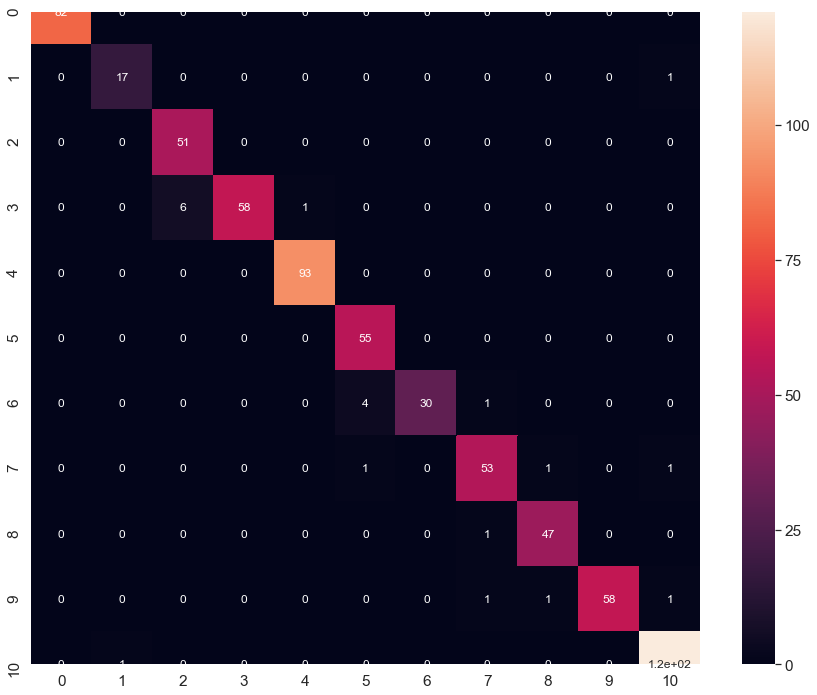

In [7]:

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)






df_cm = pd.DataFrame(cm, range(11), range(11))
plt.figure(figsize=(15,12))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

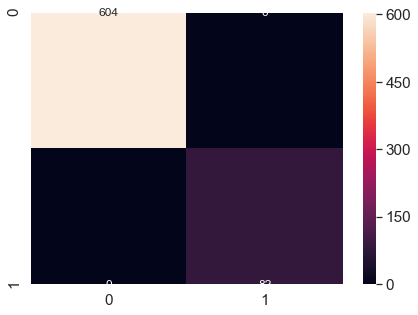

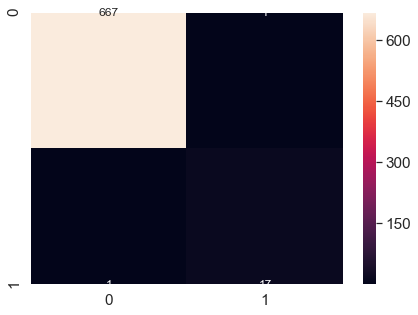

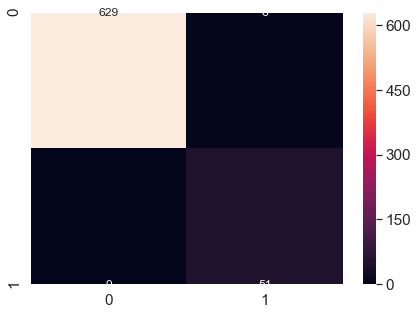

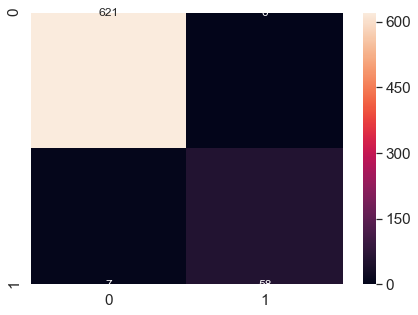

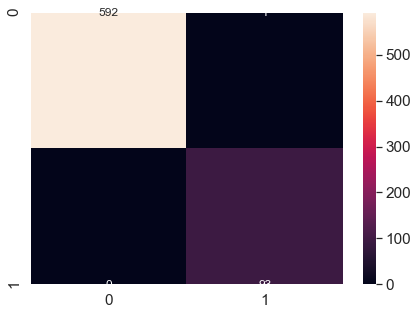

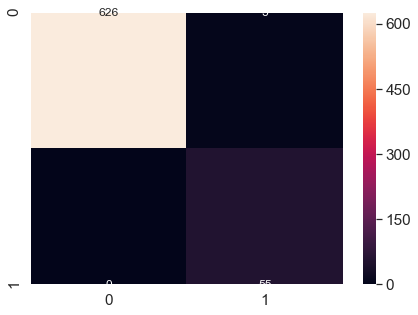

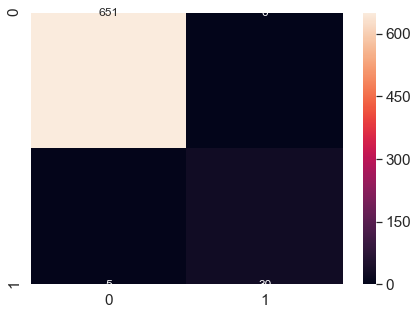

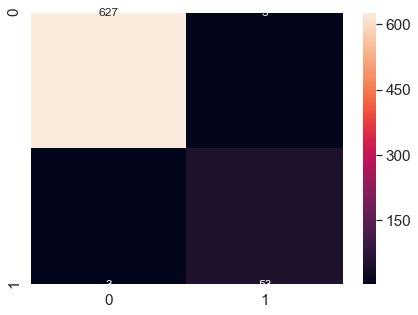

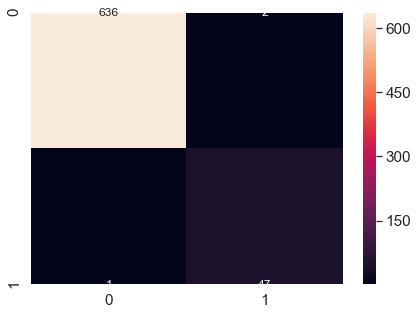

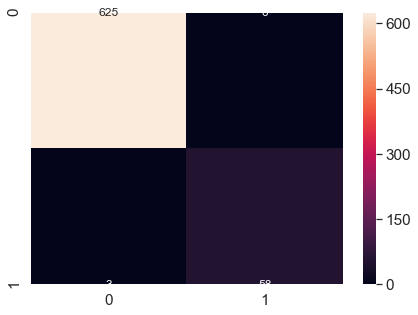

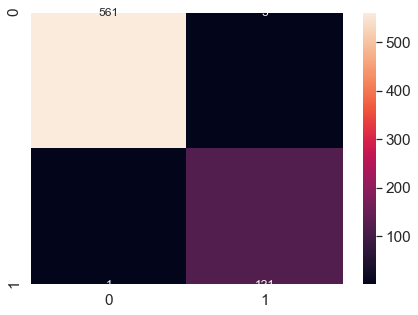

In [8]:
# multilabel_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix as mcm
MCM = mcm(y_test, y_pred)

for i in range(0,len(MCM)):
    df_cm = pd.DataFrame(MCM[i], range(2), range(2))
    plt.figure(figsize=(7,5))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = '.0f') # font size
    plt.show()

In [9]:

#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9693877551020408

In [10]:

# explained_variance_score
from sklearn.metrics import explained_variance_score as evs
evs(y_test, y_pred)

0.974843975596084

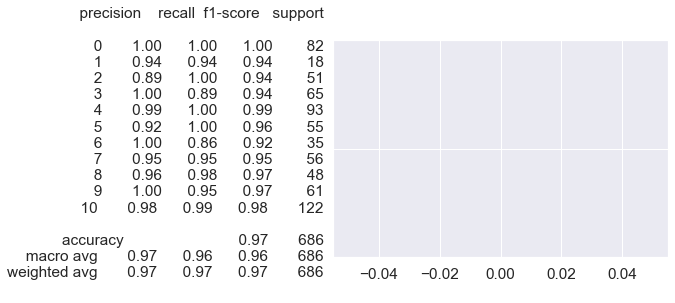

In [11]:

# Classification report
from sklearn.metrics import classification_report
c_report = classification_report(y_test, y_pred)
c_report

plt.plot(c_report)